# Курсовая работа на тему активного обучения.

Активное обучение (active learning) — это метод машинного обучения, в котором алгоритм активно отбирает наиболее информативные данные для разметки и обучения модели. В традиционном подходе к машинному обучению модель обучается на заранее размеченных данных. В активном обучении модель имеет возможность влиять на процесс выбора данных, чтобы повысить свою эффективность и точность, особенно при ограниченных ресурсах для разметки данных.

Основные аспекты активного обучения:
Выборка данных с наибольшей неопределенностью:

Модель анализирует неразмеченные данные и выбирает те примеры, на которых она делает наименее уверенные предсказания. Такие примеры содержат больше информации для улучшения модели.

Информативность данных:

Вместо случайного выбора данных для разметки и обучения, активное обучение фокусируется на наиболее информативных данных, что позволяет более эффективно использовать доступные ресурсы.

Интерактивный процесс:

Алгоритм активного обучения итеративно выбирает новые данные, добавляет их к обучающему набору и переобучает модель. Этот процесс повторяется до достижения желаемого уровня точности модели.



# Целевая модель - ResNet-18
В качестве целевой модели выбрана модель ResNet-18
ResNet-18 (Residual Network-18) — это архитектура нейронной сети, предназначенная для задач распознавания изображений и других задач компьютерного зрения.
ResNet-18 состоит из 18 слоев с обучаемыми параметрами.
Используются остаточные блоки (residual blocks), каждый из которых состоит из двух слоев сверточных нейронов и skip connection, которая добавляет входные данные блока к его выходу.


# Датасет - Fashion MNIST
Для реализации работы взят датасет Fashion MNIST
Основные характеристики Fashion MNIST:
Размер изображений: 28x28 пикселей.
Количество классов: 10 классов (например, футболка, брюки, пальто и т.д.).
Тип изображений: Градации серого (черно-белые)

https://www.kaggle.com/datasets/zalando-research/fashionmnist
*В качестве основного датасета для работы взята выборка train, с которой производились дальнейшие операции (выложен в папку https://drive.google.com/drive/folders/1AdXmhrWX0G8LMVuXNJ7WpJgi5UMFFT9j?usp=drive_link)

# 1. В качестве первого алгоритма активного обучения выбран алгоритм BALD
Алгоритм активного обучения BALD (Batch Active Learning by Diverse Sampling) предназначен для выбора наиболее полезных примеров для обучения модели. Основная идея заключается в том, чтобы выбирать примеры, которые наиболее разнообразны и информативны, чтобы улучшить обучение модели.

Основные принципы алгоритма BALD:

Инициализация: Начинается с небольшого набора примеров.

Оценка разнообразия: Для каждого неразмеченного примера вычисляется мера разнообразия, которая показывает, насколько он отличается от уже выбранных примеров.

Оценка информативности: Для каждого неразмеченного примера вычисляется мера информативности, которая показывает, насколько он поможет улучшить модель.

Выбор примеров: Выбираются примеры с наивысшими значениями разнообразия и информативности.

Обновление модели: Новые примеры добавляются в обучающий набор, и модель обновляется.

Этот процесс повторяется до достижения желаемого уровня точности или ограничения по количеству доступных примеров.

# 2. В качестве второго алгоритма активного обучения выбран алгоритм Least Confidence
Least Confidence Sampling (LCS) — это один из методов активного обучения, который помогает выбирать наиболее полезные примеры для аннотации и обучения модели. Основная идея заключается в том, чтобы выбирать примеры, для которых модель наименее уверена в своих предсказаниях.

Основные шаги Least Confidence Sampling:

Предсказание: Модель делает предсказания для всех неразмеченных примеров в наборе данных.

Оценка уверенности: Для каждого примера рассчитывается уровень уверенности модели в своем предсказании. Это обычно делается путем оценки вероятности наиболее вероятного класса.

Выбор примеров: Выбираются примеры с наименьшим уровнем уверенности, то есть те, для которых модель наименее уверена в своем предсказании.

Аннотация и обновление модели: Выбранные примеры аннотируются и добавляются в обучающий набор, модель обновляется.

# 3. В качестве третьего алгоритма активного обучения выбран алгоритм BAIT
BAIT (Batch Active Learning via Information maTrices) - метод активного обучения, который использует информационные матрицы для выбора наиболее информативных примеров данных. Основная цель BAIT заключается в улучшении производительности модели при минимальных затратах на разметку данных, путем эффективного выбора данных для обучения.


# 1. Подготовка

## Импорт необходимых библиотек

In [1]:
import pandas as pd  # Импортируем библиотеку pandas для работы с данными в формате DataFrame
import numpy as np  # Импортируем библиотеку numpy для работы с массивами и числовыми операциями
import torch  # Импортируем библиотеку PyTorch для работы с тензорами и построения нейронных сетей
import random  # Импортируем модуль random для работы с случайными значениями
from torch import nn, optim  # Импортируем модули nn и optim из библиотеки torch для построения нейронных сетей и оптимизации
from torch.utils.data import Dataset, DataLoader, Subset  # Импортируем классы Dataset, DataLoader и Subset из библиотеки torch для работы с данными
from torchvision import models  # Импортируем модуль models из библиотеки torchvision для работы с предобученными моделями
from sklearn.model_selection import train_test_split  # Импортируем функцию train_test_split из библиотеки sklearn для разбиения данных на обучающую и тестовую выборки
from sklearn.metrics import f1_score  # Импортируем функцию f1_score из библиотеки sklearn для расчета метрики F1
from scipy.spatial.distance import cdist  # Импортируем функцию cdist из библиотеки scipy для вычисления расстояний между точками в многомерном пространстве
import matplotlib.pyplot as plt



## Загрузка датасета и разделение выборки на обучающую и тестовую

In [2]:
# Чтение данных из CSV файла
data = pd.read_csv('Fashion-MNIST_dataset.csv')  # Загружаем датасет MNIST из файла CSV в DataFrame

# Разделение данных на признаки (X) и метки (y)
X = data.drop(columns=['label']).values  # Удаляем столбец 'label' и получаем значения признаков
y = data['label'].values  # Извлекаем значения меток

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Используем функцию train_test_split для разбиения данных:
# X_train, y_train - обучающие данные и метки
# X_test, y_test - тестовые данные и метки
# test_size=0.2 - 20% данных выделяем для тестовой выборки, 80% данных для обучения
# random_state=42 - фиксируем случайное состояние для воспроизводимости результата


# Создание и подготовка данных для обучения и тестирования

In [6]:
# Определяем класс MNISTDataset, наследующий от класса Dataset PyTorch
class MNISTDataset(Dataset):
    def __init__(self, images, labels=None):
        self.images = images  # Инициализируем изображения
        self.labels = labels  # Инициализируем метки

    def __len__(self):
        return len(self.images)  # Возвращаем количество изображений в датасете

    def __getitem__(self, idx):
        image = self.images[idx]  # Извлекаем изображение по индексу
        image = np.stack([image.reshape(28, 28)] * 3, axis=-1)  # Преобразуем изображение в формат 3-х каналов (RGB)
        image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1)  # Преобразуем изображение в тензор и переставляем оси для PyTorch
        image = image / 255  # Нормализуем изображение (приводим значения к диапазону [0, 1])

        label = self.labels[idx]  # Извлекаем метку по индексу
        return image, label  # Возвращаем пару (изображение, метка)

# Создаем экземпляры датасетов для обучающей и тестовой выборок
train_dataset = MNISTDataset(X_train, y_train)  # Обучающий датасет
test_dataset = MNISTDataset(X_test, y_test)  # Тестовый датасет

# Создаем загрузчики данных для обучения и тестирования
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)  # Загрузчик данных для обучения с размером батча 128 и перемешиванием данных
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)  # Загрузчик данных для тестирования с размером батча 128 без перемешивания данных


## Обучение модели на всём датасете

In [7]:
# Определяем устройство для вычислений: используем GPU (cuda), если доступно, иначе используем CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_model(train_loader, num_epochs=5):
    # Загружаем предобученную модель ResNet-18
    model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

    # Заменяем последний полносвязный слой на новый, соответствующий нашему числу классов (10 для MNIST)
    model.fc = nn.Linear(model.fc.in_features, 10)

    # Переносим модель на выбранное устройство (GPU или CPU)
    model = model.to(device)

    # Определяем функцию потерь (кросс-энтропия) и оптимизатор (Adam)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Устанавливаем модель в режим обучения
    model.train()

    # Основной цикл обучения
    for _ in range(num_epochs):
        running_loss = 0  # Инициализируем переменную для накопления потерь

        # Проходим по всем батчам данных в загрузчике данных
        for images, labels in train_loader:
            # Переносим изображения и метки на выбранное устройство
            images, labels = images.to(device), labels.to(device)

            # Пропускаем изображения через модель и получаем предсказания
            outputs = model(images)

            # Вычисляем потерю (ошибку) между предсказаниями и реальными метками
            loss = criterion(outputs, labels)

            # Обнуляем градиенты
            optimizer.zero_grad()

            # Выполняем обратное распространение ошибки для вычисления градиентов
            loss.backward()

            # Обновляем параметры модели с помощью оптимизатора
            optimizer.step()

            # Накопление значения потерь
            running_loss += loss.item()

    return model  # Возвращаем обученную модель


In [8]:
# Обучаем модель с использованием функции train_model
target_model = train_model(train_loader, 5)
# Вызываем функцию train_model для обучения модели
# Передаем обучающий загрузчик данных (train_loader)
# Устанавливаем количество эпох обучения (5)
# Результатом работы функции train_model является обученная модель (target_model)


# Тестирования модели и вычисление F1-метрики:

In [9]:
def test_model(model, test_loader):
    model.eval()  # Переводим модель в режим оценки (evaluation)
    all_preds = []  # Инициализируем список для хранения всех предсказаний
    all_labels = []  # Инициализируем список для хранения всех истинных меток

    with torch.no_grad():  # Отключаем вычисление градиентов для ускорения и экономии памяти
        for images, labels in test_loader:  # Проходим по батчам данных в загрузчике тестовых данных
            images = images.to(device)  # Переносим изображения на устройство (CPU или GPU)
            labels = labels.to(device)  # Переносим метки на устройство (CPU или GPU)

            outputs = model(images)  # Пропускаем изображения через модель и получаем предсказания
            _, preds = torch.max(outputs, 1)  # Определяем класс с наибольшей вероятностью для каждого изображения

            all_preds.extend(preds.cpu().numpy())  # Добавляем предсказания в список и переводим их на CPU
            all_labels.extend(labels.cpu().numpy())  # Добавляем истинные метки в список и переводим их на CPU

    f1 = f1_score(all_labels, all_preds, average='weighted')  # Вычисляем F1-метрику с учетом веса классов
    return f1  # Возвращаем значение F1-метрики


In [10]:
# Запускаем тестирование модели target_model на тестовой выборке
f1_target_model = test_model(target_model, test_loader)

# Выводим результат
print(f'F1-метрика для полной выборки: {f1_target_model}')


F1-метрика для полной выборки: 0.9068876693112772


## Создание подвыборок и обучение модели на них

In [11]:
# Инициализируем пустой словарь для хранения обученных моделей
models_dict = {}

# Функция для создания подмножества датасета
def create_subset(dataset, fraction=1):
    dataset_size = len(dataset)  # Получаем размер датасета
    subset_size = int(dataset_size * fraction)  # Вычисляем размер подмножества на основе заданной доли
    indices = random.sample(range(dataset_size), subset_size)  # Случайным образом выбираем индексы для подмножества
    return Subset(dataset, indices)  # Возвращаем подмножество датасета

# Проходим по разным значениям долей данных
for fraction in [0.01, 0.1, 0.2]:
    # Создаем подмножество обучающего датасета с заданной долей данных
    new_train_dataset = create_subset(train_dataset, fraction)
    # Создаем загрузчик данных для нового обучающего подмножества
    new_train_loader = DataLoader(new_train_dataset, batch_size=128, shuffle=True)
    # Обучаем модель на новом обучающем подмножестве в течение 5 эпох и сохраняем в словарь
    models_dict[f'{int(fraction*100)}%'] = train_model(new_train_loader, 5)

# Добавляем полную обученную модель в словарь с ключом "100%"
models_dict["100%"] = target_model


## Теститрование полученных моделей

In [12]:
# Функция для тестирования модели
def test_model(model, test_loader):
    model.eval()  # Переводим модель в режим оценки
    f1 = 0  # Инициализируем переменную для накопления F1-метрик

    for _ in range(5):  # Проводим оценку модели 5 раз для получения усредненного результата
        all_preds = []  # Список для хранения всех предсказанных меток
        all_labels = []  # Список для хранения всех истинных меток

        with torch.no_grad():  # Отключаем вычисление градиентов для экономии памяти и ускорения
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)  # Переносим изображения и метки на устройство
                outputs = model(images)  # Пропускаем изображения через модель для получения предсказаний
                _, predicted = torch.max(outputs, 1)  # Извлекаем предсказанные метки

                all_preds.extend(predicted.cpu().numpy())  # Добавляем предсказанные метки в список
                all_labels.extend(labels.cpu().numpy())  # Добавляем истинные метки в список

        # Вычисляем F1-метрику для текущей итерации и добавляем к общей F1
        f1 += f1_score(all_labels, all_preds, average='weighted')
    f1 = round(f1 / 5, 3)  # Усредняем F1-метрику по 5 итерациям и округляем до 3 знаков после запятой
    return f1  # Возвращаем усредненную F1-метрику

# Выводим заголовок для таблицы результатов
print("Размер выборки\tF1-метрика")

# Проходим по всем моделям в словаре models_dict
for fraction, model in models_dict.items():
    f1 = test_model(model, test_loader)  # Тестируем модель и получаем F1-метрику
    print(f'{fraction}\t\t{f1}')  # Выводим долю обучающей выборки и соответствующую F1-метрику


Размер выборки	F1-метрика
1%		0.674
10%		0.848
20%		0.869
100%		0.907


# 2. Активное обучение

*Загрузка данных и подготовка датасета для активного обучения*


In [37]:
# Загрузка датасета Fashion MNIST
data = pd.read_csv('Fashion-MNIST_dataset.csv')

# Разделение данных на признаки (X) и метки (y)
X = data.drop(columns=['label']).values
y = data['label'].values

# Разделение на обучающую и тестовую выборки
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Создание класса датасета для PyTorch
class MNISTDataset(Dataset):
    def __init__(self, images, labels=None):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        # Получаем изображение по индексу
        image = self.images[idx]
        # Преобразуем изображение в формат 3 канала (RGB)
        image = np.stack([image.reshape(28, 28)] * 3, axis=-1)
        # Преобразуем изображение в тензор и переставляем оси
        image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1)
        # Нормализуем изображение
        image = image / 255.0

        if self.labels is not None:
            # Если метки доступны, возвращаем пару (изображение, метка)
            label = self.labels[idx]
            return image, label
        else:
            # Если метки недоступны (неразмеченные данные), возвращаем только изображение
            return image

# Создаем полный обучающий датасет (неразмеченные данные)
unlabeled_dataset = MNISTDataset(X_train_full)

# Создаем тестовый датасет
test_dataset = MNISTDataset(X_test, y_test)

# Создаем загрузчик данных для тестового датасета
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)


*Определение устройства и функций для инициализации, обучения и тестирования модели*

In [39]:
# Определяем устройство для вычислений (GPU или CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Функция для инициализации модели ResNet-18
def initialize_model():
    # Загружаем предобученную модель ResNet-18
    model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
    # Заменяем последний слой на новый с числом классов 10
    model.fc = nn.Linear(model.fc.in_features, 10)
    # Переносим модель на выбранное устройство
    model = model.to(device)
    return model

# Функция для обучения модели
def train_model(model, train_loader, num_epochs=5):
    # Определяем функцию потерь и оптимизатор
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    # Устанавливаем модель в режим обучения
    model.train()

    for epoch in range(num_epochs):
        running_loss = 0.0
        # Проходим по всем батчам данных
        for images, labels in train_loader:
            # Переносим данные на устройство
            images, labels = images.to(device), labels.to(device)
            # Обнуляем градиенты
            optimizer.zero_grad()
            # Получаем предсказания модели
            outputs = model(images)
            # Вычисляем функцию потерь
            loss = criterion(outputs, labels)
            # Выполняем обратное распространение ошибки
            loss.backward()
            # Обновляем параметры модели
            optimizer.step()
            # Накопление потерь
            running_loss += loss.item()
    return model

# Функция для тестирования модели и вычисления F1-метрики
def test_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        # Проходим по всем батчам тестовых данных
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model(images)
            # Получаем предсказанные классы
            _, preds = torch.max(outputs, 1)
            # Сохраняем предсказания и истинные метки
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())

    # Вычисляем F1-метрику
    f1 = f1_score(all_labels, all_preds, average='weighted')
    return f1

*Реализация функций выборки для активного обучения*

*Функция выборки по алгоритму BALD*

In [44]:
# Функция для выборки наиболее информативных данных по алгоритму BALD
def bald_sampling(model, unlabeled_loader, sample_size):
    model.eval()
    uncertainties = []
    indices = []

    with torch.no_grad():
        # Проходим по всем неразмеченным данным
        for idx, images in enumerate(unlabeled_loader):
            images = images.to(device)
            outputs = model(images)
            # Вычисляем вероятности классов с помощью softmax
            probs = torch.softmax(outputs, dim=1)
            # Вычисляем энтропию предсказаний для каждого образца
            entropy = -torch.sum(probs * torch.log(probs + 1e-10), dim=1)
            # Сохраняем значения энтропии
            uncertainties.extend(entropy.cpu().numpy())
            # Сохраняем индексы образцов
            indices.extend(range(idx * unlabeled_loader.batch_size, (idx + 1) * unlabeled_loader.batch_size))

    uncertainties = np.array(uncertainties)
    # Выбираем индексы образцов с наибольшей неопределенностью
    selected_indices = uncertainties.argsort()[-sample_size:]
    selected_data_indices = [indices[i] for i in selected_indices]
    return selected_data_indices


*Функция выборки по алгоритму Least Confidence*

In [46]:
# Функция для выборки наиболее неуверенных предсказаний по алгоритму Least Confidence
def least_confidence_sampling(model, unlabeled_loader, sample_size):
    model.eval()
    uncertainties = []
    indices = []

    with torch.no_grad():
        # Проходим по всем неразмеченным данным
        for idx, images in enumerate(unlabeled_loader):
            images = images.to(device)
            outputs = model(images)
            # Вычисляем вероятности классов с помощью softmax
            probs = torch.softmax(outputs, dim=1)
            # Находим максимальную вероятность для каждого образца
            max_probs, _ = torch.max(probs, dim=1)
            # Вычисляем неопределенность как (1 - максимальная вероятность)
            uncertainties.extend(1 - max_probs.cpu().numpy())
            # Сохраняем индексы образцов
            indices.extend(range(idx * unlabeled_loader.batch_size, (idx + 1) * unlabeled_loader.batch_size))

    uncertainties = np.array(uncertainties)
    # Выбираем индексы образцов с наибольшей неопределенностью
    selected_indices = uncertainties.argsort()[-sample_size:]
    selected_data_indices = [indices[i] for i in selected_indices]
    return selected_data_indices


*Функция выборки по алгоритму BAIT*

In [47]:
# Функция для выборки наиболее информативных предсказаний по алгоритму BAIT
def bait_sampling(model, unlabeled_loader, sample_size):
    model.eval()
    information_matrices = []
    indices = []

    with torch.no_grad():
        # Проходим по всем неразмеченным данным
        for idx, images in enumerate(unlabeled_loader):
            images = images.to(device)
            outputs = model(images)
            # Вычисляем вероятности классов с помощью softmax
            probs = torch.softmax(outputs, dim=1)
            
            # Вычисляем информационную матрицу (пример: используем логарифмы вероятностей)
            info_matrix = -torch.sum(probs * torch.log(probs + 1e-9), dim=1)
            information_matrices.extend(info_matrix.cpu().numpy())
            
            # Сохраняем индексы образцов
            indices.extend(range(idx * unlabeled_loader.batch_size, (idx + 1) * unlabeled_loader.batch_size))

    information_matrices = np.array(information_matrices)
    # Выбираем индексы образцов с наибольшей информационной ценностью
    selected_indices = information_matrices.argsort()[-sample_size:]
    selected_data_indices = [indices[i] for i in selected_indices]
    return selected_data_indices

*Цикл активного обучения*

# Инициализация начального размеченного набора данных изложена в статье: https://habr.com/ru/articles/593615/

In [48]:
# Доли данных для экспериментов
fractions = [0.01, 0.1, 0.2]

# Словарь для хранения результатов
results = {
    'BALD': {},
    'Least Confidence': {},
    'BAIT': {}
}

# Проходим по каждой доле данных
for fraction in fractions:
    # Инициализируем начальный размеченный набор (1% случайных данных)
    initial_size = int(len(unlabeled_dataset) * 0.01)
    labeled_indices = random.sample(range(len(unlabeled_dataset)), initial_size)
    unlabeled_indices = list(set(range(len(unlabeled_dataset))) - set(labeled_indices))

    # Создаем размеченный и неразмеченный датасеты
    labeled_dataset = Subset(MNISTDataset(X_train_full, y_train_full), labeled_indices)
    unlabeled_dataset_subset = Subset(MNISTDataset(X_train_full), unlabeled_indices)

    # Создаем загрузчики данных
    labeled_loader = DataLoader(labeled_dataset, batch_size=128, shuffle=True)
    unlabeled_loader = DataLoader(unlabeled_dataset_subset, batch_size=128, shuffle=False)

    # Количество выборок для добавления
    total_acquisition = int(len(X_train_full) * fraction) - initial_size
    acquisition_iterations = total_acquisition // initial_size

    # --- Активное обучение с алгоритмом BALD ---
    # Копируем списки индексов для BALD
    bald_labeled_indices = labeled_indices.copy()
    bald_unlabeled_indices = unlabeled_indices.copy()
    # Инициализируем модель для BALD
    bald_model = initialize_model()
    # Обучаем модель на начальном размеченном наборе
    bald_model = train_model(bald_model, labeled_loader, num_epochs=5)

    for _ in range(acquisition_iterations):
        # Создаем неразмеченный датасет для BALD
        bald_unlabeled_dataset = Subset(MNISTDataset(X_train_full), bald_unlabeled_indices)
        bald_unlabeled_loader = DataLoader(bald_unlabeled_dataset, batch_size=128, shuffle=False)
        # Выбираем новые данные по алгоритму BALD
        new_indices = bald_sampling(bald_model, bald_unlabeled_loader, initial_size)
        new_data_indices = [bald_unlabeled_indices[i] for i in new_indices]
        # Обновляем списки индексов
        bald_labeled_indices.extend(new_data_indices)
        bald_unlabeled_indices = list(set(bald_unlabeled_indices) - set(new_data_indices))
        # Обновляем размеченный датасет и загрузчик
        bald_labeled_dataset = Subset(MNISTDataset(X_train_full, y_train_full), bald_labeled_indices)
        bald_labeled_loader = DataLoader(bald_labeled_dataset, batch_size=128, shuffle=True)
        # Переобучаем модель на обновленном наборе данных
        bald_model = train_model(bald_model, bald_labeled_loader, num_epochs=5)

    # Тестируем модель и сохраняем F1-метрику
    f1_bald = test_model(bald_model, test_loader)
    results['BALD'][f'{int(fraction * 100)}%'] = f1_bald
    
    # --- Активное обучение с алгоритмом Least Confidence ---
    # Копируем списки индексов для Least Confidence
    lc_labeled_indices = labeled_indices.copy()
    lc_unlabeled_indices = unlabeled_indices.copy()
    # Инициализируем модель для Least Confidence
    lc_model = initialize_model()
    # Обучаем модель на начальном размеченном наборе
    lc_model = train_model(lc_model, labeled_loader, num_epochs=5)

    for _ in range(acquisition_iterations):
        # Создаем неразмеченный датасет для Least Confidence
        lc_unlabeled_dataset = Subset(MNISTDataset(X_train_full), lc_unlabeled_indices)
        lc_unlabeled_loader = DataLoader(lc_unlabeled_dataset, batch_size=128, shuffle=False)
        # Выбираем новые данные по алгоритму Least Confidence
        new_indices = least_confidence_sampling(lc_model, lc_unlabeled_loader, initial_size)
        new_data_indices = [lc_unlabeled_indices[i] for i in new_indices]
        # Обновляем списки индексов
        lc_labeled_indices.extend(new_data_indices)
        lc_unlabeled_indices = list(set(lc_unlabeled_indices) - set(new_data_indices))
        # Обновляем размеченный датасет и загрузчик
        lc_labeled_dataset = Subset(MNISTDataset(X_train_full, y_train_full), lc_labeled_indices)
        lc_labeled_loader = DataLoader(lc_labeled_dataset, batch_size=128, shuffle=True)
        # Переобучаем модель на обновленном наборе данных
        lc_model = train_model(lc_model, lc_labeled_loader, num_epochs=5)

    # Тестируем модель и сохраняем F1-метрику
    f1_lc = test_model(lc_model, test_loader)
    results['Least Confidence'][f'{int(fraction * 100)}%'] = f1_lc
    
    # --- Активное обучение с алгоритмом BAIT ---
    # Копируем списки индексов для BAIT
    bait_labeled_indices = labeled_indices.copy()
    bait_unlabeled_indices = unlabeled_indices.copy()
    # Инициализируем модель для BAIT
    bait_model = initialize_model()
    # Обучаем модель на начальном размеченном наборе
    bait_model = train_model(bait_model, labeled_loader, num_epochs=5)

    for _ in range(acquisition_iterations):
        # Создаем неразмеченный датасет для BAIT
        bait_unlabeled_dataset = Subset(MNISTDataset(X_train_full), bait_unlabeled_indices)
        bait_unlabeled_loader = DataLoader(bait_unlabeled_dataset, batch_size=128, shuffle=False)
        # Выбираем новые данные по алгоритму BAIT
        new_indices = bait_sampling(bait_model, bait_unlabeled_loader, initial_size)
        new_data_indices = [bait_unlabeled_indices[i] for i in new_indices]
        # Обновляем списки индексов
        bait_labeled_indices.extend(new_data_indices)
        bait_unlabeled_indices = list(set(bait_unlabeled_indices) - set(new_data_indices))
        # Обновляем размеченный датасет и загрузчик
        bait_labeled_dataset = Subset(MNISTDataset(X_train_full, y_train_full), bait_labeled_indices)
        bait_labeled_loader = DataLoader(bait_labeled_dataset, batch_size=128, shuffle=True)
        # Переобучаем модель на обновленном наборе данных
        bait_model = train_model(bait_model, bait_labeled_loader, num_epochs=5)

    # Тестируем модель и сохраняем F1-метрику
    f1_bait = test_model(bait_model, test_loader)
    results['BAIT'][f'{int(fraction * 100)}%'] = f1_bait        



# Результаты

In [49]:
# Вывод результатов в виде таблицы для каждого алгоритма
for method in ['BALD', 'Least Confidence', 'BAIT']:
    print(f"\n{method}")
    print("Размер выборки (%)\tКоличество элементов в выборке\tF1-метрика")
    for fraction in ['1%', '10%', '20%']:
        sample_size = int(len(X_train_full) * (int(fraction.strip('%')) / 100))
        f1_score_value = results[method][fraction]
        print(f"{fraction}\t\t\t{sample_size}\t\t\t\t{f1_score_value:.3f}")


BALD
Размер выборки (%)	Количество элементов в выборке	F1-метрика
1%			480				0.734
10%			4800				0.889
20%			9600				0.912

Least Confidence
Размер выборки (%)	Количество элементов в выборке	F1-метрика
1%			480				0.742
10%			4800				0.896
20%			9600				0.908

BAIT
Размер выборки (%)	Количество элементов в выборке	F1-метрика
1%			480				0.706
10%			4800				0.895
20%			9600				0.907


# 3. Анализ результата

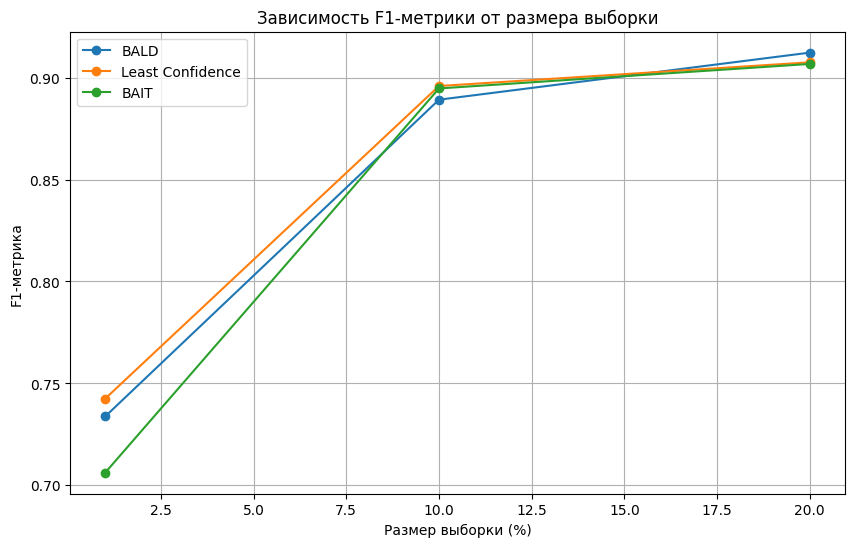

In [50]:
# Размеры выборки в процентах
sample_sizes = [1, 10, 20]

# Построение графика
plt.figure(figsize=(10, 6))

# График для алгоритма BALD
plt.plot(sample_sizes, [results['BALD'][f'{s}%'] for s in sample_sizes], marker='o', label='BALD')

# График для алгоритма Least Confidence
plt.plot(sample_sizes, [results['Least Confidence'][f'{s}%'] for s in sample_sizes], marker='o', label='Least Confidence')

# График для алгоритма BAIT
plt.plot(sample_sizes, [results['BAIT'][f'{s}%'] for s in sample_sizes], marker='o', label='BAIT')

# Настройка заголовка и осей
plt.title('Зависимость F1-метрики от размера выборки')
plt.xlabel('Размер выборки (%)')
plt.ylabel('F1-метрика')
plt.legend()
plt.grid(True)
plt.show()

# Вывод

Все алгоритмы активного обучения показали примерно одинаковую эффективность, которая превышает значения обучения на выборках для целевой модели. Обучение на 20% выборке данных при активном обучении сопоставима с результатами обучения целевойй модели на 100% выборке.
